<a href="https://colab.research.google.com/github/habeebperwad/mlesa/blob/master/Assignment%2005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Which of the following statements are true? Check all that apply.

'**Option A: RIGHT**:
![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q1CH1.PNG?seed=42738&url=assets/img/A5Q1CH1.PNG)




'**Option B: RIGHT**: ![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q1CH2.PNG?seed=73122&url=assets/img/A5Q1CH2.PNG)
- [Hope this explains why linear regression is not the best fit for classification problems!](https://stats.stackexchange.com/a/22382)
- [You can apply linear regression for classification by assigning a threshold](https://discuss.analyticsvidhya.com/t/using-linear-regression-for-a-classification-problem/9848/3)

~~Option **C**: WRONG:~~ ![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q1CH3.PNG?seed=72683&url=assets/img/A5Q1CH3.PNG)
- I assume the cost function is cross-entropy.
- [not sure] Cross-entropy is a convex function so local-minimum same as global minimum in any convex function.


**Option D: RIGHT** ![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q1CH4.PNG?seed=94602&url=assets/img/A5Q1CH4.PNG)

- Least squares cost function is [convex](https://math.stackexchange.com/a/2774380) 
function
- [Any local minimum of a convex function is also a global minimum](https://en.wikipedia.org/wiki/Convex_function).

---------------
*Accepted Answer: A,B,C,D*

---------------

### 2.
![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q2.PNG?seed=38052&url=assets/img/A5Q2.PNG)

**Option A: RIGHT**:  ![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q2CH1.PNG?seed=3287&url=assets/img/A5Q2CH1.PNG)
- Cross-entropy value always non-negative. see option-A of question-1
- This option is bit strange. It won't have any direct relation with the question. if they used "J(w)=0", it may make some sense!! 

Option **B**: WRONG:
![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q2CH2.PNG?seed=62950&url=assets/img/A5Q2CH2.PNG)
- The value of y_hat is the output ofsigmoid function. The range of sigmoid is [0, 1]. So the value of y_hat cannot be greater than1.


**Option C: RIGHT**: ![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q2CH3.PNG?seed=17502&url=assets/img/A5Q2CH3.PNG)

- More feature make the model complex. Complex model overfit the training data easily if there is no regularization. See the below program to see the Cross-entropy value before and after adding polynomial features .


Option **D**: WRONG: ![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q2CH4.PNG?seed=4198&url=assets/img/A5Q2CH4.PNG)
 - See the below image. You cannot draw a straight line so that all green dots in one side and red dot in other side.

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
X = [[0.5,1], [1.5, 1], [1, 2], [1,3]]
y = [1,1,0,1]
clf = LogisticRegression( solver='lbfgs').fit(X, y)
print("Cross-entropy before poly: %0.4f" % (log_loss(y,clf.predict_proba(X)),))

Xpoly = []

for x in X:
  item = x
  item.append(x[0]**2) # adding x1^2
  item.append(x[1]**2) # adding x2^2
  item.append(x[0]*x[1]) # adding x1*x2
  Xpoly.append(item)
  
clfpoly = LogisticRegression(solver='lbfgs').fit(Xpoly, y)
print("Cross-entropy after poly: %.4f" %(log_loss(y,clfpoly.predict_proba(Xpoly)),))

Cross-entropy before poly: 0.5538
Cross-entropy after poly: 0.5424


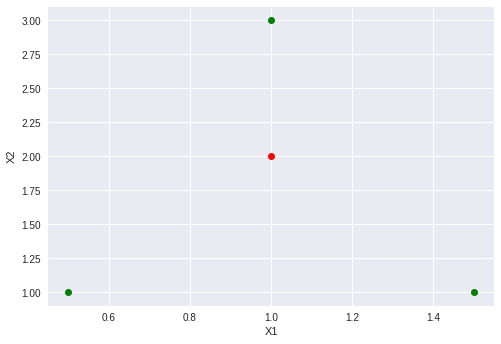

In [6]:
x1_1 = [0.5, 1.5, 1] # x1 with ouput 1
x2_1 = [1, 1, 3] # x2 with ouput 1
x1_0 = [1] # x1 with ouput 0
x2_0 = [2] # x2 with ouput 0


import matplotlib.pyplot as plt
plt.plot(x1_1, x2_1, "go")
plt.plot(x1_0, x2_0, "ro")
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

### 3
![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q3NEW.PNG?seed=49333&url=assets/img/A5Q3NEW.PNG)

- **A.**  w0 = -11, w1= 6,w2= 6

- **B.**  w0 = -11, w1= 20, w2= 20

- **C.**  w0 = -35, w1 = 20, w2= 20

- **D.**  w0 = 25, w1 = 10, w2 = -30 



The AND table is given 


`x1| x2| h ` 

`------------`


`0  |  0  | 0 ` 

`0  |  1  | 0 ` 

`1  |  0  | 0 ` 

`1  |  1  | 1 ` 

In [7]:
inputs = [
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]
outputs = [0, 0, 0, 1]

option_A = {"w0": -11, "w1": 6, "w2": 6}
option_B = {"w0": -11, "w1": 20, "w2": 20}
option_C = {"w0": -35, "w1": 20, "w2": 20}
option_D = {"w0": 25, "w1": 10, "w2": -30}

h = lambda x1,x2, w0, w1, w2: 1 if (w0+x1*w1+x2*w2) >= 0 else 0

h_expand = lambda input, option: h(input[0], input[1], option["w0"], option["w1"], option["w2"])

def isSatisfyAND(option):
  for input,output in zip(inputs, outputs):
    if(h_expand(input, option)!=output):
      return False
  return True


print("Option A: ", "RIGHT" if isSatisfyAND(option_A) else "WRONG")
print("Option B: ", "RIGHT" if isSatisfyAND(option_B) else "WRONG")
print("Option C: ", "RIGHT" if isSatisfyAND(option_C) else "WRONG")
print("Option D: ", "RIGHT" if isSatisfyAND(option_D) else "WRONG")



Option A:  RIGHT
Option B:  WRONG
Option C:  RIGHT
Option D:  WRONG


### 4 
![alt text](https://onlinecourses.nptel.ac.in/noc19_cs14/assets/img/A5Q4.PNG?seed=85145&url=assets/img/A5Q4.PNG)


Here input layer contains 2 inputs. The inputs connected to two neurons in the hiddent layer.
Each neurons in the hidden layer will have seprate bias-weight.
Total weights = 2 inputs * 2 hidden neurons + 2 bias for two hidden layer neurons = 6 weights

**ANSWER#4:  6**
Output layer can have one or two neurons. If it is one, use sigmoid. For two, use softmax.
Usually it will be one. And the question says we need to use sigmoid. So I conclude the output layer contain only one neuron.

The two neurons in the hidden layer connected to oe neuron in the output layer.
The neron in the output layer will have bias-weight.
Total weights = 2 hidden layer neurons * 1 ouput neuron + 1 bias for the ouput layer neurons = 3 weights

**ANSWER#5:  3**


In [8]:
import math

def a(x):
  return 1.0 / (1 + math.exp(-x))

z = lambda w0, w1, w2, x1, x2: w0+x1*w1+x2*w2



inputs =[
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
outputs = [0, 1, 1, 0]


def y(x1, x2):
  hidden_layer_neuron1z = z(1, 1, 1, x1, x2)
  hidden_layer_neuron2z =z(1, 1, 1, x1, x2)
  
  hidden_layer_neuron1a = a(hidden_layer_neuron1z)
  hidden_layer_neuron2a = a(hidden_layer_neuron2z)
  output_layer_neuronz = z(1, 1, 1, hidden_layer_neuron1a, hidden_layer_neuron2a)
  output_layer_neurona = a(output_layer_neuronz)
  #print(locals())
  return output_layer_neurona


print("ANSWER#6 %4.2f" % y(1,0))


first = y(inputs[0][0], inputs[0][1])
second = y(inputs[1][0], inputs[1][1])
third = y(inputs[2][0], inputs[2][1])
fourth = y(inputs[3][0], inputs[3][1])
print("ANSWER#7 A: 1st and 2nd equal : ", "YES" if first==second else "NO")
print("ANSWER#7 B: 2nd and 3rd equal : ", "YES" if second==third else "NO")
print("ANSWER#7 C: 3rd and 4th equal : ", "YES" if third==fourth else "NO")
print("ANSWER#7 D: 4th and 1st equal : ", "YES" if fourth==first else "NO")

ANSWER#6 0.94
ANSWER#7 A: 1st and 2nd equal :  NO
ANSWER#7 B: 2nd and 3rd equal :  YES
ANSWER#7 C: 3rd and 4th equal :  NO
ANSWER#7 D: 4th and 1st equal :  NO


--------------------

Accepted answer for **Question 6 is 0.99**. I don't know what is the issue with my solution!

--------------------

### Based on data, Answer questions 8-10:

Dear Students,

There is a mistake in multiple choice options of Questions 8, 9, 10 in Assignment 5.
Kindly make a random choice, marks will be given to any option selected.

Regards, NPTEL. Feb 27
